In [ ]:
#Load data, prepare for mapping


D:\Anaconda\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: F:\SquirrelPI\MexicoExploration\mexican-states.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


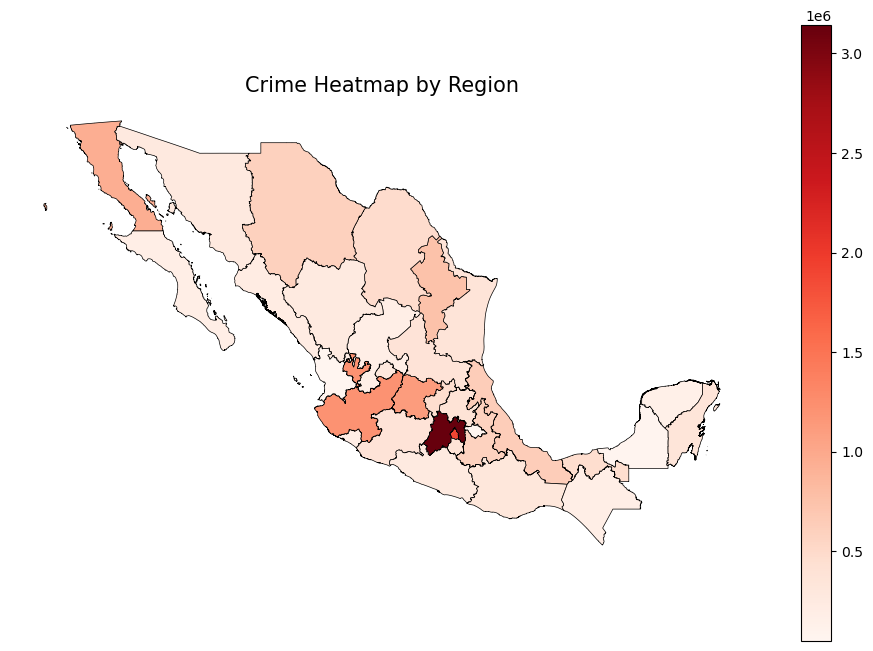

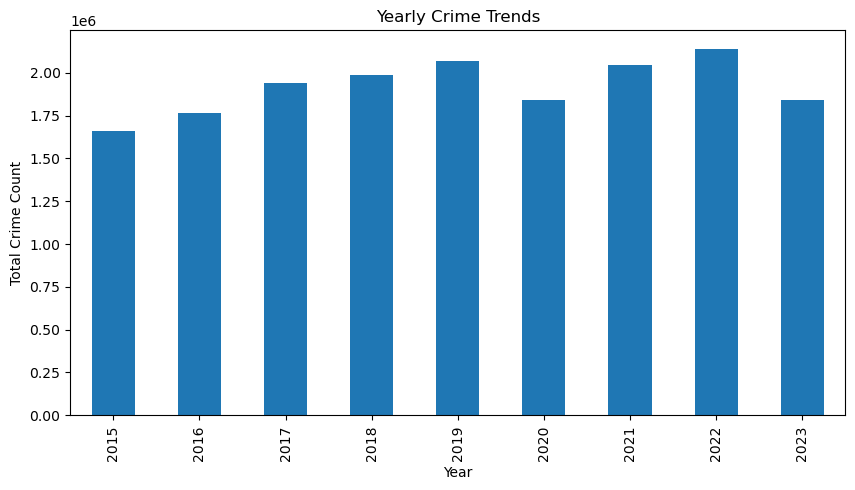

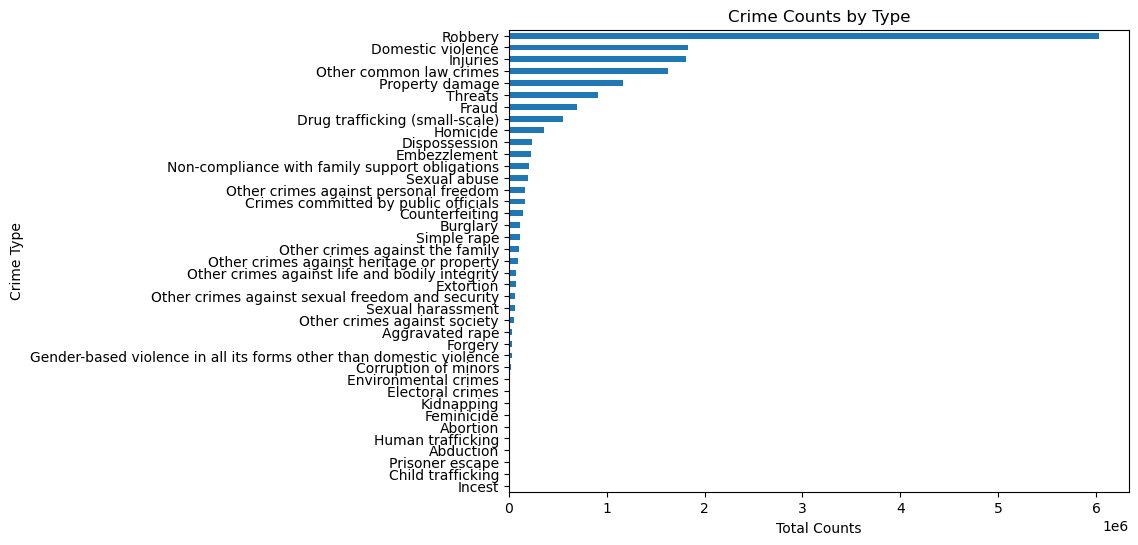

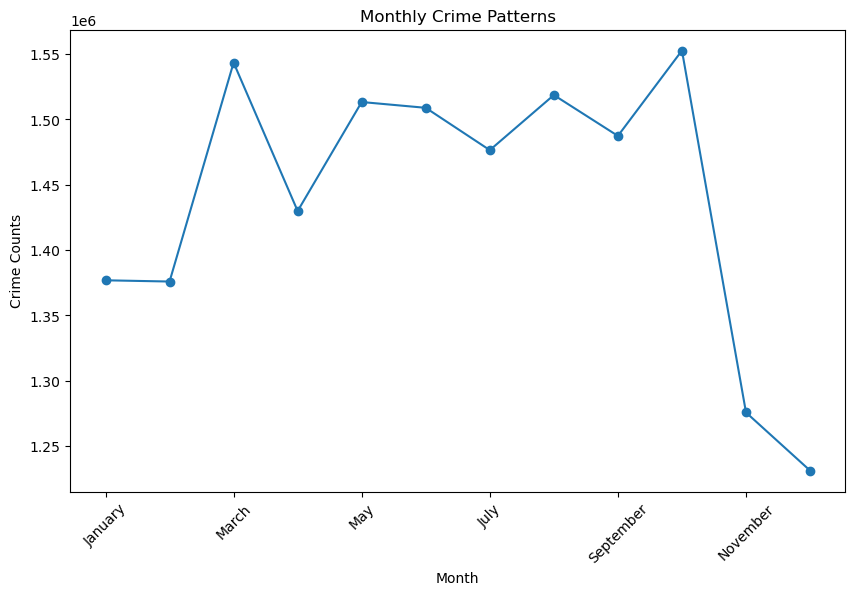

In [9]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV dataset
df = pd.read_csv(r"F:\SquirrelPI\MexicoExploration\mexdata\mexico_crime.csv")

# Load your shapefile
states_map = gpd.read_file(r"F:\SquirrelPI\MexicoExploration\mexican-states.shp")

# Merge function to create geographical data
def merge_data(df, states_map):
    agg_df = df.groupby('entity', as_index=False)['count'].sum()
    merged = states_map.merge(agg_df, left_on='name', right_on='entity', how='left').fillna(0)
    return merged

# Function to plot heatmap by region
def plot_crime_heatmap(merged, title, cmap='Reds'):
    fig, ax = plt.subplots(figsize=(12, 8))
    merged.plot(column='count', cmap=cmap, linewidth=0.5, edgecolor='k', legend=True, ax=ax)
    plt.title(title, fontsize=15)
    plt.axis('off')
    plt.show()

# Function to plot yearly crime trends
def plot_yearly_trends(df):
    plt.figure(figsize=(10,5))
    yearly = df.groupby('year')['count'].sum()
    yearly.plot(kind='bar')
    plt.title("Yearly Crime Trends")
    plt.xlabel("Year")
    plt.ylabel("Total Crime Count")
    plt.show()

# Function to visualize type/subtype of crime
def plot_crime_types(df):
    crime_type = df.groupby('type_of_crime')['count'].sum().sort_values()
    crime_type.plot(kind='barh', figsize=(8,6))
    plt.title("Crime Counts by Type")
    plt.xlabel("Total Counts")
    plt.ylabel("Crime Type")
    plt.show()

# Function to visualize monthly patterns
def plot_monthly_patterns(df):
    months_order = ["January", "February", "March", "April", "May", "June",
                    "July", "August", "September", "October", "November", "December"]
    monthly = df.groupby('month')['count'].sum().reindex(months_order)
    monthly.plot(kind='line', marker='o', figsize=(10,6))
    plt.title("Monthly Crime Patterns")
    plt.xlabel("Month")
    plt.ylabel("Crime Counts")
    plt.xticks(rotation=45)
    plt.show()

# Run all plots
merged_data = merge_data(df, states_map)
plot_crime_heatmap(merged_data, "Crime Heatmap by Region")
plot_yearly_trends(df)
plot_crime_types(df)
plot_monthly_patterns(df)


C:\Users\Spark\AppData\Local\Temp\ipykernel_8072\3374820565.py:12: MatplotlibDeprecationWarning: Keeping empty pdf files is deprecated since 3.8 and support will be removed in 3.10.
  with PdfPages('Criminology_Report.pdf') as pdf:
D:\Anaconda\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: F:\SquirrelPI\MexicoExploration\mexican-states.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


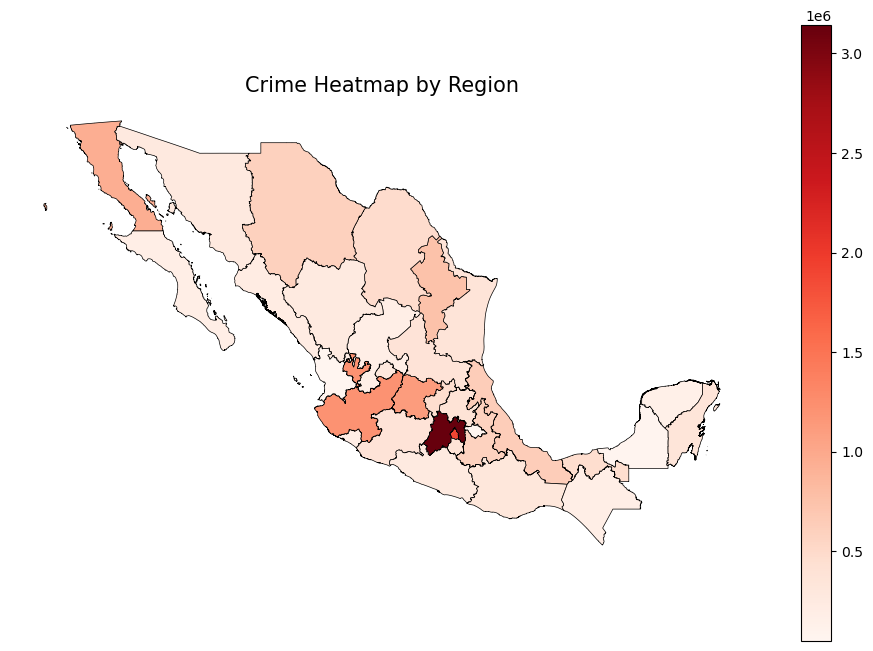

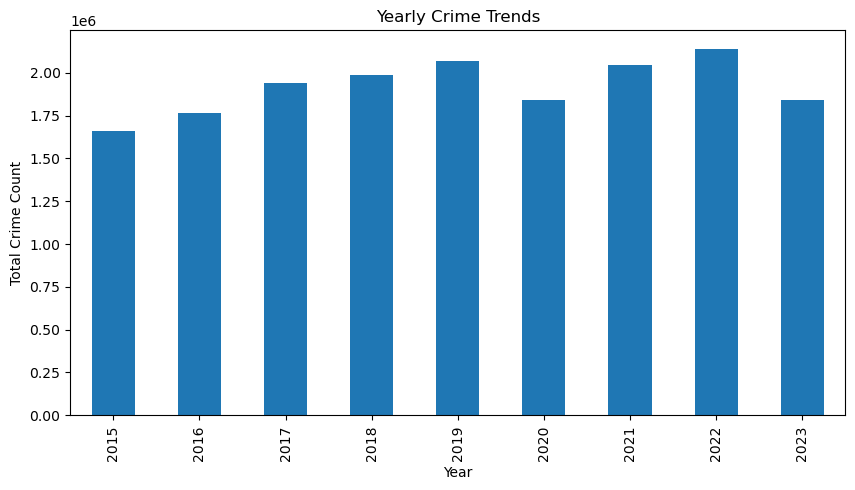

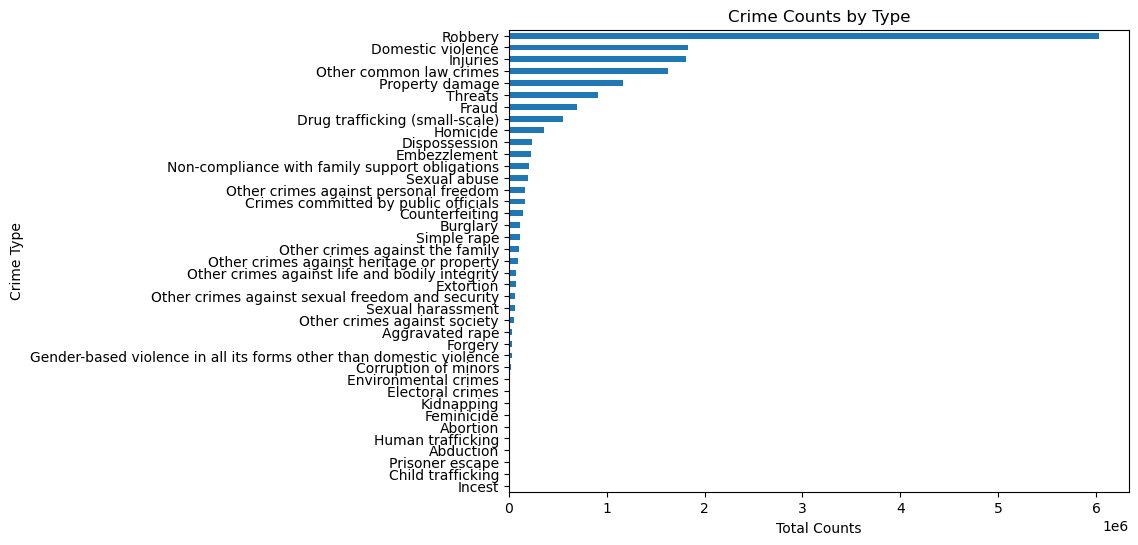

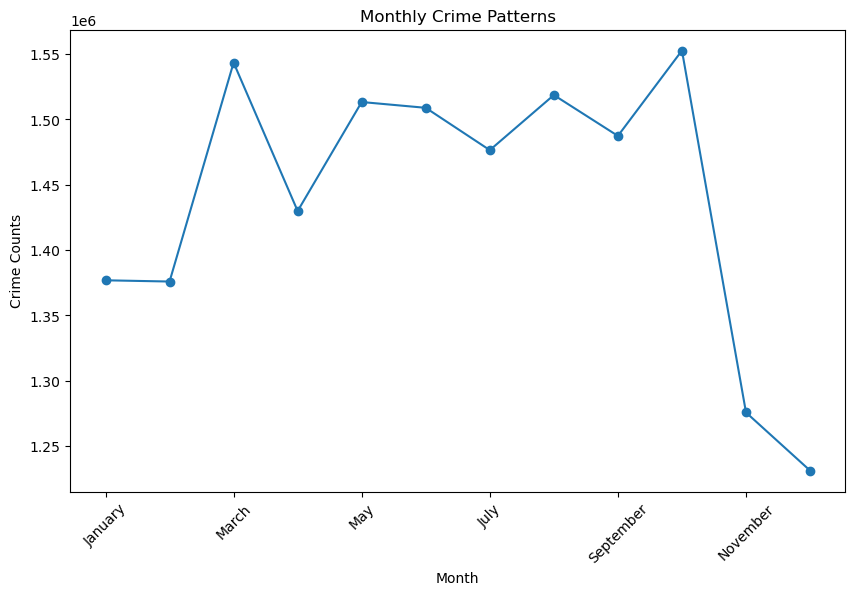

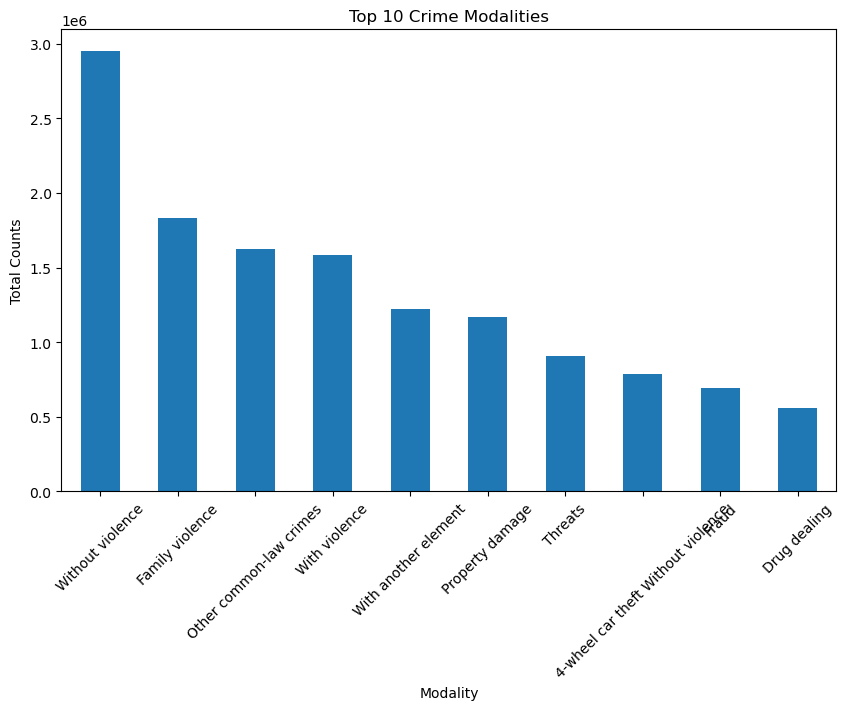

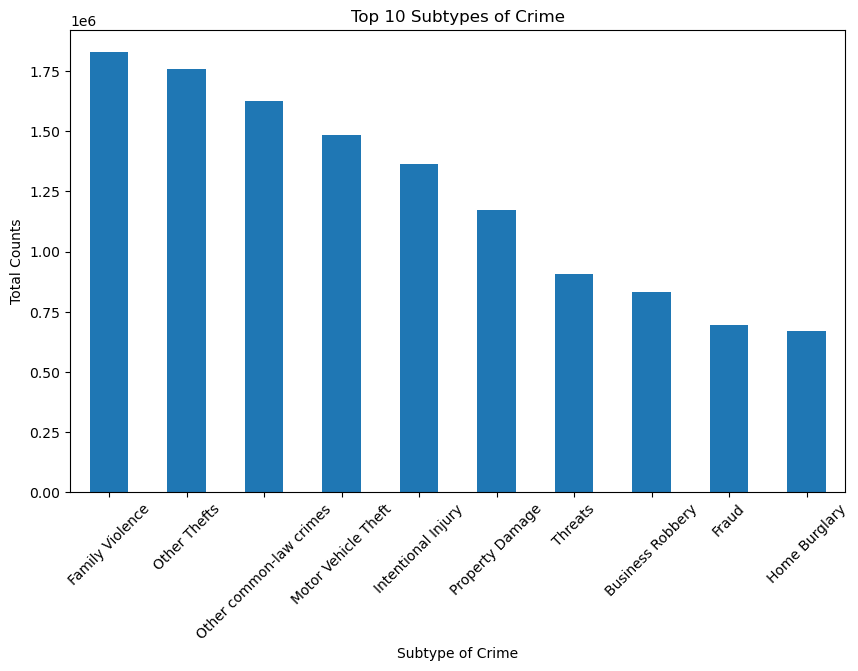

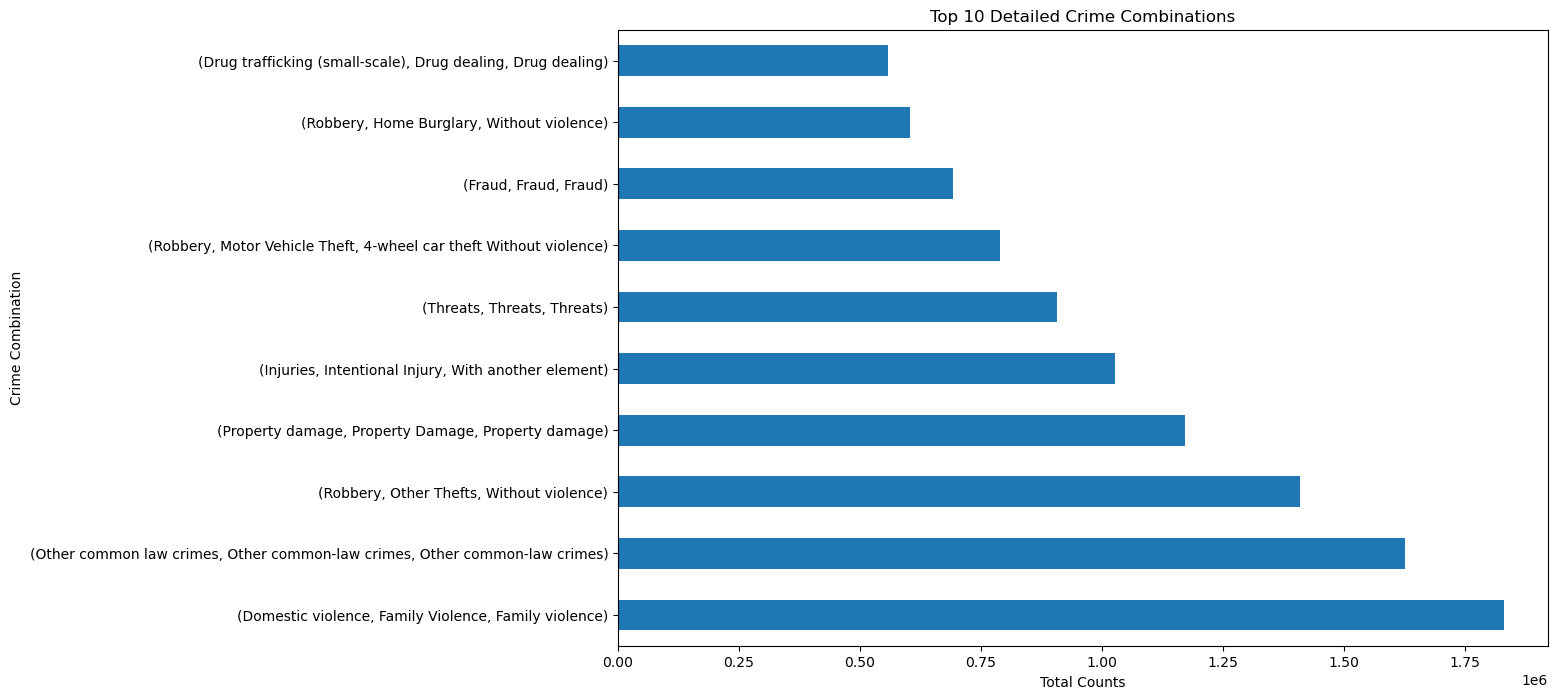

In [10]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns



import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Save all plots to a single PDF
with PdfPages('Criminology_Report.pdf') as pdf:
    figs = [plt.figure(n) for n in plt.get_fignums()]
    for fig in figs:
        pdf.savefig(fig, bbox_inches='tight')

# Optionally, convert PDF to HTML if required using external tools (e.g., pandoc)



# Load your CSV dataset
df = pd.read_csv(r"F:\SquirrelPI\MexicoExploration\mexdata\mexico_crime.csv")

# Load your shapefile
states_map = gpd.read_file(r"F:\SquirrelPI\MexicoExploration\mexican-states.shp")
# Merge function to create geographical data
def merge_data(df, states_map):
    agg_df = df.groupby('entity', as_index=False)['count'].sum()
    merged = states_map.merge(agg_df, left_on='name', right_on='entity', how='left').fillna(0)
    return merged

# Function to plot heatmap by region
def plot_crime_heatmap(merged, title, cmap='Reds'):
    fig, ax = plt.subplots(figsize=(12, 8))
    merged.plot(column='count', cmap=cmap, linewidth=0.5, edgecolor='k', legend=True, ax=ax)
    plt.title(title, fontsize=15)
    plt.axis('off')
    plt.show()

# Function to plot yearly crime trends
def plot_yearly_trends(df):
    plt.figure(figsize=(10,5))
    yearly = df.groupby('year')['count'].sum()
    yearly.plot(kind='bar')
    plt.title("Yearly Crime Trends")
    plt.xlabel("Year")
    plt.ylabel("Total Crime Count")
    plt.show()

# Function to visualize type/subtype of crime
def plot_crime_types(df):
    crime_type = df.groupby('type_of_crime')['count'].sum().sort_values()
    crime_type.plot(kind='barh', figsize=(8,6))
    plt.title("Crime Counts by Type")
    plt.xlabel("Total Counts")
    plt.ylabel("Crime Type")
    plt.show()

# Function to visualize monthly patterns
def plot_monthly_patterns(df):
    months_order = ["January", "February", "March", "April", "May", "June",
                    "July", "August", "September", "October", "November", "December"]
    monthly = df.groupby('month')['count'].sum().reindex(months_order)
    monthly.plot(kind='line', marker='o', figsize=(10,6))
    plt.title("Monthly Crime Patterns")
    plt.xlabel("Month")
    plt.ylabel("Crime Counts")
    plt.xticks(rotation=45)
    plt.show()

# Additional informative charts:
# Modality breakdown
def plot_crime_modalities(df):
    modality = df.groupby('modality')['count'].sum().sort_values(ascending=False).head(10)
    modality.plot(kind='bar', figsize=(10,6))
    plt.title("Top 10 Crime Modalities")
    plt.xlabel("Modality")
    plt.ylabel("Total Counts")
    plt.xticks(rotation=45)
    plt.show()

# Subtype breakdown
def plot_subtype_breakdown(df):
    subtype = df.groupby('subtype_of_crime')['count'].sum().sort_values(ascending=False).head(10)
    subtype.plot(kind='bar', figsize=(10,6))
    plt.title("Top 10 Subtypes of Crime")
    plt.xlabel("Subtype of Crime")
    plt.ylabel("Total Counts")
    plt.xticks(rotation=45)
    plt.show()

# Detailed breakdown by type, subtype, modality
def plot_detailed_breakdown(df):
    detailed = df.groupby(['type_of_crime', 'subtype_of_crime', 'modality'])['count'] \
                 .sum().sort_values(ascending=False).head(10)
    detailed.plot(kind='barh', figsize=(12,8))
    plt.title("Top 10 Detailed Crime Combinations")
    plt.xlabel("Total Counts")
    plt.ylabel("Crime Combination")
    plt.show()

# Generate all plots
merged_data = merge_data(df, states_map)
plot_crime_heatmap(merged_data, "Crime Heatmap by Region")
plot_yearly_trends(df)
plot_crime_types(df)
plot_monthly_patterns(df)
plot_crime_modalities(df)
plot_subtype_breakdown(df)
plot_detailed_breakdown(df)


In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import base64
from io import BytesIO

# Load datasets
df = pd.read_csv(r"F:\SquirrelPI\MexicoExploration\mexdata\mexico_crime.csv")

# Load your shapefile
states_map = gpd.read_file(r"F:\SquirrelPI\MexicoExploration\mexican-states.shp")

# Function to save plot images to HTML
def fig_to_base64_img(fig):
    img = BytesIO()
    fig.savefig(img, format='png', bbox_inches='tight')
    img.seek(0)
    encoded = base64.b64encode(img.read()).decode('utf-8')
    plt.close(fig)
    return f'<img src="data:image/png;base64,{encoded}" style="width:80%;margin:20px auto;display:block;">'

# Plot functions modified to return figs
def plot_heatmap_html(merged, title):
    fig, ax = plt.subplots(figsize=(12, 8))
    merged.plot(column='count', cmap='Reds', linewidth=0.5, edgecolor='k', legend=True, ax=ax)
    ax.set_title(title, fontsize=15)
    ax.axis('off')
    return fig_to_base64_img(fig)

def plot_bar_html(data, title, xlabel, ylabel, kind='bar', rot=0):
    fig, ax = plt.subplots(figsize=(10,6))
    data.plot(kind=kind, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.xticks(rotation=rot)
    return fig_to_base64_img(fig)

# Prepare data
merged = states_map.merge(df.groupby('entity', as_index=False)['count'].sum(), 
                          left_on='name', right_on='entity', how='left').fillna(0)

# Generate plots
html_content = '''
<html>
<head><title>Comprehensive Criminology Report</title></head>
<body style="font-family:Arial;">
<h1 style="text-align:center;">Comprehensive Criminology Report</h1>
'''

# Add plots to HTML
html_content += '<h2 style="text-align:center;">Crime Heatmap by Region</h2>'
html_content += plot_heatmap_html(merged, "Crime Heatmap by Region")

html_content += '<h2 style="text-align:center;">Yearly Crime Trends</h2>'
yearly = df.groupby('year')['count'].sum()
html_content += plot_bar_html(yearly, "Yearly Crime Trends", "Year", "Total Crime Counts", 'bar')

html_content += '<h2 style="text-align:center;">Crime Counts by Type</h2>'
crime_type = df.groupby('type_of_crime')['count'].sum().sort_values()
html_content += plot_bar_html(crime_type, "Crime Counts by Type", "Type of Crime", "Counts", 'barh')

html_content += '<h2 style="text-align:center;">Monthly Crime Patterns</h2>'
monthly_order = ["January", "February", "March", "April", "May", "June", "July", "August",
                 "September", "October", "November", "December"]
monthly = df.groupby('month')['count'].sum().reindex(monthly_order)
html_content += plot_bar_html(monthly, "Monthly Crime Patterns", "Month", "Crime Counts", 'line', rot=45)

# Additional insightful plots
modality = df.groupby('modality')['count'].sum().sort_values(ascending=False).head(10)
html_content += '<h2 style="text-align:center;">Top 10 Crime Modalities</h2>'
html_content += plot_bar_html(modality, "Top 10 Crime Modalities", "Modality", "Counts", rot=45)

subtype = df.groupby('subtype_of_crime')['count'].sum().sort_values(ascending=False).head(10)
html_content += '<h2 style="text-align:center;">Top 10 Subtypes of Crime</h2>'
html_content += plot_bar_html(subtype, "Top 10 Subtypes of Crime", "Subtype of Crime", "Counts", rot=45)

detailed = df.groupby(['type_of_crime','subtype_of_crime','modality'])['count'].sum().sort_values(ascending=False).head(10)
html_content += '<h2 style="text-align:center;">Top 10 Detailed Crime Combinations</h2>'
html_content += plot_bar_html(detailed, "Top 10 Detailed Crime Combinations", "Crime Combination", "Counts", 'barh')

# Finish HTML file
html_content += '</body></html>'

# Write the HTML content to a file
with open("Criminology_Report.html", "w", encoding='utf-8') as f:
    f.write(html_content)

print("HTML report generated successfully: Criminology_Report.html")


D:\Anaconda\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: F:\SquirrelPI\MexicoExploration\mexican-states.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


HTML report generated successfully: Criminology_Report.html
